# Step 2

In [ ]:
#download necessary packages 
#!apt-get install python3.5
import pandas as pd
!pip install pyradiomics
from radiomics import featureextractor 
import os 
import numpy as np
import collections

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary packages:

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier 
from sklearn import svm

In [ ]:
import SimpleITK as sitk

In [ ]:
import radiomics
from radiomics.featureextractor import RadiomicsFeatureExtractor

In [ ]:
from __future__ import print_function

from collections import OrderedDict
import csv
from datetime import datetime
import logging
from multiprocessing import cpu_count, Pool
import os
import shutil
import threading

In [ ]:
from pathlib import Path
import glob, os, shutil
import re
import sys
import itertools as it
import csv
from collections import Counter

## 1) Load in the TCGA data

### 2) Load TCGA clinical and Radiomics feature data file

In [ ]:
TCGA_feature = "/content/drive/MyDrive/HIDS509 - Imaging Informatics/HIDS509 - Final Project/data/TCGA_pyradiomics_features/allFeatures_TCGA_onlypyradiomics.csv"
TCGA_df = pd.read_csv(TCGA_feature)

In [ ]:
TCGA_df

,Unnamed: 0,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Source
0,0,TCGA-02-0006,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",cf7eef9f6f12a01d6619c43bdd3c73682ea3cb1a,502,41.681753,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,18.357560,16.401219,19.026298,308.125000,12.901075,0.280044,787.786220,2.556710,384,TCGA-GBM
1,1,TCGA-02-0009,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",2a6de38eb2a01829058381d08d359df1a627f4df,844,37.192602,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,31.048349,33.286634,36.249138,4240.375000,21.857589,0.353025,3588.790560,0.846338,4349,TCGA-GBM
2,2,TCGA-02-0011,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",abd84417a8ec942a889872dfed222e0e1c56b5df,518,36.052124,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,92.763139,70.228199,104.278473,48177.250000,52.467970,0.348870,18353.330280,0.380954,48610,TCGA-GBM
3,3,TCGA-02-0027,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",36b7a0b79122686dd0546bc3e79e2695d3118138,2474,177.964626,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,40.311289,47.010637,47.968740,7196.875000,23.419801,0.398880,4519.303940,0.627954,7587,TCGA-GBM
4,4,TCGA-02-0033,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",9b8efeae3748d9049ab7982cac58a6c07b6b0477,880,35.767669,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,38.948684,38.910153,41.821047,7054.375000,27.698853,0.493544,3604.103902,0.510903,7137,TCGA-GBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,TCGA-HT-8106,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",9bfb7f1f427a8ee8ce5984f551a35b23569fb4b1,2021,154.770743,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,53.150729,57.008771,57.645468,17048.500000,33.057007,0.315599,10150.163260,0.595370,17236,TCGA-LGG-BRA
239,239,TCGA-HT-8107,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",7bb203ea0b6e07f913064fa765ea19ddfd9c3179,2718,227.325157,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,18.439089,17.029386,21.118712,1291.458333,12.149919,0.632883,906.179029,0.701671,1317,TCGA-LGG-BRA
240,240,TCGA-HT-8113,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",1cf646b410e52a24bb6fc1fd90e2366870b6c6a6,849,57.828124,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,42.154478,46.529561,63.921827,15087.666670,31.859740,0.601311,4910.581761,0.325470,15221,TCGA-LGG-BRA
241,241,TCGA-HT-A5RC,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",828d7df25757d55b3df3488b6cb29bfbb62ca219,3214,210.373473,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,65.145990,53.037722,67.512962,1414.708333,43.587137,0.188710,3229.484760,2.282792,1789,TCGA-LGG-BRA


In [ ]:
TCGA_clinical = "/content/drive/MyDrive/HIDS509 - Imaging Informatics/HIDS509 - Final Project/data/TCGA_clinical_data/2022_TCGA_GBM_LGG_pyradiomicsIDs_231patients.csv"
clinical_df = pd.read_csv(TCGA_clinical)

In [ ]:
clinical_df['Disease_Type'] = clinical_df['Disease_Type'].str.upper()

In [ ]:
clinical_df['Disease_Type']

0      ASTROCYTOMA
1      ASTROCYTOMA
2      ASTROCYTOMA
3      ASTROCYTOMA
4      ASTROCYTOMA
          ...     
226            GBM
227            GBM
228            GBM
229            GBM
230            GBM
Name: Disease_Type, Length: 231, dtype: object

In [ ]:
#drop all TCGA files that have "Oligoastrocytoma" as disease type
clean_clin_df = clinical_df.drop(clinical_df[clinical_df.Disease_Type == "OLIGOASTROCYTOMA"].index)

In [ ]:
clean_clin_df

,Row.names,Disease_Type,Gender,Race
0,TCGA-CS-4941,ASTROCYTOMA,MALE,WHITE
1,TCGA-CS-4942,ASTROCYTOMA,FEMALE,BLACK OR AFRICAN AMERICAN
2,TCGA-CS-4943,ASTROCYTOMA,MALE,WHITE
3,TCGA-CS-4944,ASTROCYTOMA,MALE,WHITE
4,TCGA-CS-5393,ASTROCYTOMA,MALE,WHITE
...,...,...,...,...
226,TCGA-14-1829,GBM,MALE,BLACK OR AFRICAN AMERICAN
227,TCGA-19-1390,GBM,FEMALE,WHITE
228,TCGA-27-1834,GBM,MALE,WHITE
229,TCGA-27-1838,GBM,FEMALE,WHITE


In [ ]:
#check all "Oligoastrocytoma" rows are deleted
Counter(clean_clin_df["Disease_Type"])

Counter({'ASTROCYTOMA': 32, 'GBM': 124, 'OLIGODENDROGLIOMA': 47})

In [ ]:
labels = clean_clin_df["Disease_Type"]

In [ ]:
#drop all TCGA files that have "Oligoastrocytoma" as disease type determined by ID from clinical_df
ID_list = clean_clin_df["Row.names"].tolist()
clean_py_df = TCGA_df[TCGA_df['ID'].isin(ID_list)]

In [ ]:
clean_py_df

,Unnamed: 0,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Source
1,1,TCGA-02-0009,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",2a6de38eb2a01829058381d08d359df1a627f4df,844,37.192602,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,31.048349,33.286634,36.249138,4240.375000,21.857589,0.353025,3588.790560,0.846338,4349,TCGA-GBM
2,2,TCGA-02-0011,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",abd84417a8ec942a889872dfed222e0e1c56b5df,518,36.052124,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,92.763139,70.228199,104.278473,48177.250000,52.467970,0.348870,18353.330280,0.380954,48610,TCGA-GBM
3,3,TCGA-02-0027,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",36b7a0b79122686dd0546bc3e79e2695d3118138,2474,177.964626,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,40.311289,47.010637,47.968740,7196.875000,23.419801,0.398880,4519.303940,0.627954,7587,TCGA-GBM
4,4,TCGA-02-0033,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",9b8efeae3748d9049ab7982cac58a6c07b6b0477,880,35.767669,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,38.948684,38.910153,41.821047,7054.375000,27.698853,0.493544,3604.103902,0.510903,7137,TCGA-GBM
5,5,TCGA-02-0034,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",388b9accb5d74a568b8a2f392f79a48bf594c8ab,1294,69.541498,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,63.906181,59.304300,65.513357,24665.333330,34.936751,0.314533,13027.933800,0.528188,25394,TCGA-GBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,TCGA-HT-8105,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",d9648312341572c0060e65bb751791d614586aac,2557,145.007267,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,102.000000,104.752088,113.617780,312792.041700,74.582138,0.351672,63365.117930,0.202579,311961,TCGA-LGG-BRA
238,238,TCGA-HT-8106,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",9bfb7f1f427a8ee8ce5984f551a35b23569fb4b1,2021,154.770743,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,53.150729,57.008771,57.645468,17048.500000,33.057007,0.315599,10150.163260,0.595370,17236,TCGA-LGG-BRA
239,239,TCGA-HT-8107,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",7bb203ea0b6e07f913064fa765ea19ddfd9c3179,2718,227.325157,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,18.439089,17.029386,21.118712,1291.458333,12.149919,0.632883,906.179029,0.701671,1317,TCGA-LGG-BRA
240,240,TCGA-HT-8113,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",1cf646b410e52a24bb6fc1fd90e2366870b6c6a6,849,57.828124,0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,42.154478,46.529561,63.921827,15087.666670,31.859740,0.601311,4910.581761,0.325470,15221,TCGA-LGG-BRA


In [ ]:
#clean_py_df = clean_py_df.iloc[:, 1:131]

### Split TCGA dataset : Features (X_train) / Outcomes (y_train)

In [ ]:
y_df = clean_clin_df['Disease_Type']

In [ ]:
clean_clin_df.rename(columns = {'Row.names' : 'ID'}, inplace = True)

In [ ]:
clean_clin_df

,ID,Disease_Type,Gender,Race
0,TCGA-CS-4941,ASTROCYTOMA,MALE,WHITE
1,TCGA-CS-4942,ASTROCYTOMA,FEMALE,BLACK OR AFRICAN AMERICAN
2,TCGA-CS-4943,ASTROCYTOMA,MALE,WHITE
3,TCGA-CS-4944,ASTROCYTOMA,MALE,WHITE
4,TCGA-CS-5393,ASTROCYTOMA,MALE,WHITE
...,...,...,...,...
226,TCGA-14-1829,GBM,MALE,BLACK OR AFRICAN AMERICAN
227,TCGA-19-1390,GBM,FEMALE,WHITE
228,TCGA-27-1834,GBM,MALE,WHITE
229,TCGA-27-1838,GBM,FEMALE,WHITE


In [ ]:
X = pd.merge(clean_py_df,
             clean_clin_df[['ID', 'Gender', 'Race', 'Disease_Type']],
             on = 'ID')

In [ ]:
#drop rows with ID, 3D coordinates, source, race, configuration settings, versions
X_train_df = X.drop(["ID", "Gender", "Disease_Type", "Race", "diagnostics_Image-original_Minimum","diagnostics_Image-original_Size", "diagnostics_Image-original_Spacing", "diagnostics_Mask-original_BoundingBox", 
                           "diagnostics_Mask-original_CenterOfMass", "diagnostics_Mask-original_CenterOfMassIndex", "diagnostics_Mask-original_Size", "diagnostics_Mask-original_Spacing", "Source",
                           "diagnostics_Configuration_EnabledImageTypes", "diagnostics_Configuration_Settings", "diagnostics_Image-original_Hash", "diagnostics_Mask-original_Hash", 
                          "diagnostics_Versions_Numpy", "diagnostics_Versions_PyRadiomics", "diagnostics_Versions_PyWavelet", "diagnostics_Versions_Python", "diagnostics_Versions_SimpleITK"], axis= 1)

In [ ]:
X_train_df

,Unnamed: 0,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,1,844,37.192602,4,4349,246.0,291.0,3.119856e+08,1.669089,24.0,...,28.160256,31.048349,33.286634,36.249138,4240.375000,21.857589,0.353025,3588.790560,0.846338,4349
1,2,518,36.052124,22,48610,181.0,236.0,2.151917e+09,1.866797,26.0,...,63.411355,92.763139,70.228199,104.278473,48177.250000,52.467970,0.348870,18353.330280,0.380954,48610
2,3,2474,177.964626,77,7587,1082.0,1539.0,1.301408e+10,4.789586,225.0,...,35.227830,40.311289,47.010637,47.968740,7196.875000,23.419801,0.398880,4519.303940,0.627954,7587
3,4,880,35.767669,9,7137,220.0,256.0,4.046741e+08,1.515616,16.0,...,34.132096,38.948684,38.910153,41.821047,7054.375000,27.698853,0.493544,3604.103902,0.510903,7137
4,5,1294,69.541498,94,25394,350.0,442.0,3.925545e+09,2.554710,44.0,...,53.254108,63.906181,59.304300,65.513357,24665.333330,34.936751,0.314533,13027.933800,0.528188,25394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,237,2557,145.007267,6,311961,750.0,998.0,2.450920e+11,4.048282,119.0,...,98.655968,102.000000,104.752088,113.617780,312792.041700,74.582138,0.351672,63365.117930,0.202579,311961
199,238,2021,154.770743,9,17236,746.0,961.0,1.333408e+10,3.582722,111.0,...,42.544095,53.150729,57.008771,57.645468,17048.500000,33.057007,0.315599,10150.163260,0.595370,17236
200,239,2718,227.325157,2,1317,1228.0,1340.0,2.180954e+09,2.909808,52.0,...,18.357560,18.439089,17.029386,21.118712,1291.458333,12.149919,0.632883,906.179029,0.701671,1317
201,240,849,57.828124,12,15221,321.0,434.0,2.299960e+09,2.720965,60.0,...,61.611687,42.154478,46.529561,63.921827,15087.666670,31.859740,0.601311,4910.581761,0.325470,15221


In [ ]:
#drop the unnamed column 
X_train_df = X_train_df.iloc[: , 1:]

In [ ]:
X_train_df

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,844,37.192602,4,4349,246.0,291.0,3.119856e+08,1.669089,24.0,3.456869,...,28.160256,31.048349,33.286634,36.249138,4240.375000,21.857589,0.353025,3588.790560,0.846338,4349
1,518,36.052124,22,48610,181.0,236.0,2.151917e+09,1.866797,26.0,3.479689,...,63.411355,92.763139,70.228199,104.278473,48177.250000,52.467970,0.348870,18353.330280,0.380954,48610
2,2474,177.964626,77,7587,1082.0,1539.0,1.301408e+10,4.789586,225.0,3.227854,...,35.227830,40.311289,47.010637,47.968740,7196.875000,23.419801,0.398880,4519.303940,0.627954,7587
3,880,35.767669,9,7137,220.0,256.0,4.046741e+08,1.515616,16.0,7.582218,...,34.132096,38.948684,38.910153,41.821047,7054.375000,27.698853,0.493544,3604.103902,0.510903,7137
4,1294,69.541498,94,25394,350.0,442.0,3.925545e+09,2.554710,44.0,5.043379,...,53.254108,63.906181,59.304300,65.513357,24665.333330,34.936751,0.314533,13027.933800,0.528188,25394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2557,145.007267,6,311961,750.0,998.0,2.450920e+11,4.048282,119.0,5.670885,...,98.655968,102.000000,104.752088,113.617780,312792.041700,74.582138,0.351672,63365.117930,0.202579,311961
199,2021,154.770743,9,17236,746.0,961.0,1.333408e+10,3.582722,111.0,4.257586,...,42.544095,53.150729,57.008771,57.645468,17048.500000,33.057007,0.315599,10150.163260,0.595370,17236
200,2718,227.325157,2,1317,1228.0,1340.0,2.180954e+09,2.909808,52.0,6.139446,...,18.357560,18.439089,17.029386,21.118712,1291.458333,12.149919,0.632883,906.179029,0.701671,1317
201,849,57.828124,12,15221,321.0,434.0,2.299960e+09,2.720965,60.0,2.864506,...,61.611687,42.154478,46.529561,63.921827,15087.666670,31.859740,0.601311,4910.581761,0.325470,15221


In [ ]:
#create outcome dataframe 
y = clean_clin_df["Disease_Type"]

In [ ]:
y_train = y_df

In [ ]:
X_train_df.to_csv('/content/drive/MyDrive/HIDS509 - Imaging Informatics/HIDS509 - Final Project/data/TCGA complete features/TCGA_features.csv')

In [ ]:
#replace Gender : Female = 1 and Male = 0
#X_train_df['Gender'].replace(("FEMALE"), (1), inplace = True)
#X_train_df['Gender'].replace(("MALE"), (0), inplace = True)
#X_train_df.shape

In [ ]:
#Counter(X_train_df['Gender'])

In [ ]:
X_train_df['diagnostics_Image-original_Mean'] = X_train_df['diagnostics_Image-original_Mean'].astype(int)

In [ ]:
#check for missig values
X_train_df.columns[X_train_df.isnull().any()]

Index(['original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_LowGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_LowGrayLevelRunEmphasis',
       'original_glrlm_ShortRunLowGrayLevelEmphasis',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis'],
      dtype='object')

In [ ]:
#check for infinity values
X_train_df.columns.to_series()[np.isinf(X_train_df).any()]

original_gldm_LowGrayLevelEmphasis              original_gldm_LowGrayLevelEmphasis
original_glrlm_LowGrayLevelRunEmphasis      original_glrlm_LowGrayLevelRunEmphasis
original_glszm_LowGrayLevelZoneEmphasis    original_glszm_LowGrayLevelZoneEmphasis
dtype: object

In [ ]:
#impute all inf values with the max value of that column
pd.options.mode.use_inf_as_na = True
X_train_df['original_gldm_LowGrayLevelEmphasis'].fillna(X_train_df['original_gldm_LowGrayLevelEmphasis'].max(),inplace=True)
X_train_df['original_glrlm_LowGrayLevelRunEmphasis'].fillna(X_train_df['original_glrlm_LowGrayLevelRunEmphasis'].max(),inplace=True)
X_train_df['original_glszm_LowGrayLevelZoneEmphasis'].fillna(X_train_df['original_glszm_LowGrayLevelZoneEmphasis'].max(),inplace=True)
X_train_df['original_gldm_LowGrayLevelEmphasis'].fillna(X_train_df['original_gldm_LowGrayLevelEmphasis'].max(),inplace=True)
X_train_df['original_glrlm_LowGrayLevelRunEmphasis'].fillna(X_train_df['original_glrlm_LowGrayLevelRunEmphasis'].max(),inplace=True)
X_train_df['original_glszm_LowGrayLevelZoneEmphasis'].fillna(X_train_df['original_glszm_LowGrayLevelZoneEmphasis'].max(),inplace=True)

In [ ]:
#impute all na with median value of that row 
X_train_df['original_gldm_LargeDependenceLowGrayLevelEmphasis'].fillna(int(X_train_df['original_gldm_LargeDependenceLowGrayLevelEmphasis'].mean()), inplace=True)
X_train_df['original_gldm_LowGrayLevelEmphasis'].fillna(int(X_train_df['original_gldm_LowGrayLevelEmphasis'].mean()), inplace=True)
X_train_df['original_gldm_SmallDependenceLowGrayLevelEmphasis'].fillna(int(X_train_df['original_gldm_SmallDependenceLowGrayLevelEmphasis'].mean()), inplace=True)
X_train_df['original_glrlm_LongRunLowGrayLevelEmphasis'].fillna(int(X_train_df['original_glrlm_LongRunLowGrayLevelEmphasis'].mean()), inplace=True)
X_train_df['original_glrlm_LowGrayLevelRunEmphasis'].fillna(int(X_train_df['original_glrlm_LowGrayLevelRunEmphasis'].mean()), inplace=True)
X_train_df['original_glrlm_ShortRunLowGrayLevelEmphasis'].fillna(int(X_train_df['original_glrlm_ShortRunLowGrayLevelEmphasis'].mean()), inplace=True)
X_train_df['original_glszm_LargeAreaLowGrayLevelEmphasis'].fillna(int(X_train_df['original_glszm_LargeAreaLowGrayLevelEmphasis'].mean()), inplace=True)
X_train_df['original_glszm_LowGrayLevelZoneEmphasis'].fillna(int(X_train_df['original_glszm_LowGrayLevelZoneEmphasis'].mean()), inplace=True)
X_train_df['original_glszm_SmallAreaLowGrayLevelEmphasis'].fillna(int(X_train_df['original_glszm_SmallAreaLowGrayLevelEmphasis'].mean()), inplace=True)

In [ ]:
X_train_df.columns[X_train_df.isnull().any()]

Index([], dtype='object')

In [ ]:
X_train_df.columns.to_series()[np.isinf(X_train_df).any()]

Series([], dtype: object)

In [ ]:
X_train_df

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,844,37,4,4349,246.0,291.0,3.119856e+08,1.669089,24.0,3.456869,...,28.160256,31.048349,33.286634,36.249138,4240.375000,21.857589,0.353025,3588.790560,0.846338,4349
1,518,36,22,48610,181.0,236.0,2.151917e+09,1.866797,26.0,3.479689,...,63.411355,92.763139,70.228199,104.278473,48177.250000,52.467970,0.348870,18353.330280,0.380954,48610
2,2474,177,77,7587,1082.0,1539.0,1.301408e+10,4.789586,225.0,3.227854,...,35.227830,40.311289,47.010637,47.968740,7196.875000,23.419801,0.398880,4519.303940,0.627954,7587
3,880,35,9,7137,220.0,256.0,4.046741e+08,1.515616,16.0,7.582218,...,34.132096,38.948684,38.910153,41.821047,7054.375000,27.698853,0.493544,3604.103902,0.510903,7137
4,1294,69,94,25394,350.0,442.0,3.925545e+09,2.554710,44.0,5.043379,...,53.254108,63.906181,59.304300,65.513357,24665.333330,34.936751,0.314533,13027.933800,0.528188,25394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2557,145,6,311961,750.0,998.0,2.450920e+11,4.048282,119.0,5.670885,...,98.655968,102.000000,104.752088,113.617780,312792.041700,74.582138,0.351672,63365.117930,0.202579,311961
199,2021,154,9,17236,746.0,961.0,1.333408e+10,3.582722,111.0,4.257586,...,42.544095,53.150729,57.008771,57.645468,17048.500000,33.057007,0.315599,10150.163260,0.595370,17236
200,2718,227,2,1317,1228.0,1340.0,2.180954e+09,2.909808,52.0,6.139446,...,18.357560,18.439089,17.029386,21.118712,1291.458333,12.149919,0.632883,906.179029,0.701671,1317
201,849,57,12,15221,321.0,434.0,2.299960e+09,2.720965,60.0,2.864506,...,61.611687,42.154478,46.529561,63.921827,15087.666670,31.859740,0.601311,4910.581761,0.325470,15221


In [ ]:
# Prep to Scale continuous columns:
#continuous_cols_df = X_train_df.drop(['Gender'], axis=1)
my_col_list = X_train_df.columns.values.tolist()

# Normalize continuous columns:
X_train_df[my_col_list] = StandardScaler().fit_transform(X_train_df[my_col_list])

In [ ]:
#TCGA_gender = X_train_df['Gender']

#X_TCGA_df = continuous_cols_df.join(TCGA_gender)

In [ ]:
X_train = X_train_df

In [ ]:
##fully scaled X train set (TCGA feature data including gender column)
X_train

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.299115,-0.365712,-0.768441,-0.602260,-0.297987,-0.341460,-0.166614,-0.960898,-0.354096,-0.299077,...,-1.187334,-1.207962,-0.978839,-1.115326,-0.596916,-0.996249,-0.251559,-0.676784,-0.039471,-0.602260
1,-0.363253,-0.369533,-0.229397,0.441727,-0.355801,-0.375505,-0.162371,-0.818050,-0.348210,-0.287756,...,0.906912,1.686700,0.794609,1.927755,0.437305,1.295142,-0.276402,0.783853,-0.466169,0.441727
2,0.021572,0.169183,1.417685,-0.525885,0.445592,0.431066,-0.137322,1.293724,0.237363,-0.412689,...,-0.767454,-0.773495,-0.319993,-0.591086,-0.527323,-0.879307,0.022617,-0.584730,-0.239702,-0.525885
3,-0.292033,-0.373354,-0.618707,-0.536499,-0.321112,-0.363125,-0.166401,-1.071785,-0.377636,1.747462,...,-0.832551,-0.837406,-0.708872,-0.866084,-0.530677,-0.558992,0.588640,-0.675269,-0.347022,-0.536499
4,-0.210582,-0.243451,1.926783,-0.105870,-0.205484,-0.247989,-0.158281,-0.321019,-0.295244,0.487972,...,0.303476,0.333197,0.270187,0.193718,-0.116137,-0.017187,-0.481712,0.257018,-0.331174,-0.105870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.037901,0.046921,-0.708548,6.653405,0.150295,0.096181,0.397884,0.758117,-0.074550,0.799271,...,3.000773,2.119944,2.451991,2.345520,6.666013,2.950536,-0.259650,5.236812,-0.629716,6.653405
199,-0.067552,0.081307,-0.618707,-0.298293,0.146738,0.073277,-0.136584,0.421741,-0.098091,0.098149,...,-0.332799,-0.171276,0.159986,-0.158228,-0.295428,-0.157898,-0.475341,-0.027676,-0.269577,-0.298293
200,0.069576,0.360217,-0.828335,-0.673776,0.575452,0.307883,-0.162304,-0.064453,-0.271703,1.031719,...,-1.769706,-1.799386,-1.759298,-1.792139,-0.666329,-1.722933,1.421787,-0.942171,-0.172112,-0.673776
201,-0.298131,-0.289299,-0.528866,-0.345821,-0.231278,-0.252941,-0.162030,-0.200896,-0.248163,-0.592942,...,0.799995,-0.687042,-0.343088,0.122526,-0.341584,-0.247522,1.233008,-0.546021,-0.517041,-0.345821


## Rembrandt Study - Test set 




### Load and clean Rembrandt feature matrix

In [ ]:
Rembrandt_feature = "/content/drive/MyDrive/HIDS509 - Imaging Informatics/HIDS509 - Final Project/feature_step1.csv"
rem_df = pd.read_csv(Rembrandt_feature)

In [ ]:
rem_df = rem_df.iloc[:, 1:139]

In [ ]:
rem_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7655f4c11a4506b53a1cd90186f2d6a94a5080d3,3D,"(1.0, 1.0, 1.0)",...,5.585430,0.042261,5.502875,0.015533,1.049953e+05,17.859365,0.001634,7.031347,0.014156,0.031283
1,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8bd62f34bd71689d04ce771aad06f24f1a995083,3D,"(1.0, 1.0, 1.0)",...,2.025817,0.286972,3.768432,0.082902,2.364850e+03,7.079556,0.015293,1.789718,0.014053,0.085488
2,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},ada93fd85838793cb70ed372ba7b970dfdfd7e14,3D,"(1.0, 1.0, 1.0)",...,35.355940,0.014786,6.018962,0.017495,1.667569e+05,8.060245,0.000753,34.362850,0.007333,0.078883
3,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},6020954d398eaa6bc3126ad7d93dd3864e742764,3D,"(1.0, 1.0, 1.0)",...,24.106088,0.021771,5.757754,0.023317,6.360996e+04,11.384020,0.001346,20.789822,0.038632,0.057074
4,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},afeb72f460a55f97a193e372efb507ceecf39152,3D,"(1.0, 1.0, 1.0)",...,19.896177,0.019601,5.638724,0.007766,1.395653e+06,34.243819,0.000282,22.075992,0.004893,0.025151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1c2738a8c882321a0dcb58bdffbede92dccd6343,3D,"(1.0, 1.0, 1.0)",...,16.935995,0.031794,4.999422,0.026555,7.895474e+04,12.634273,0.001492,8.578631,0.008332,0.045367
60,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a506d766ee5b4a4a597c3d05ea3b09615f2ba7f7,3D,"(1.0, 1.0, 1.0)",...,10.719529,0.033391,5.069676,0.006646,8.677014e+05,35.689957,0.000611,7.883310,0.008976,0.016650
61,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5b780927a61724882e56cf18834c2991cc6fd111,3D,"(1.0, 1.0, 1.0)",...,52.668610,0.010267,6.598848,0.028162,6.582453e+05,67.800996,0.000191,139.069546,0.016219,0.178217
62,v3.0.1,1.21.6,2.1.1.2,1.3.0,3.7.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0d7b7e8ba6dda5e9aee12a2a05849b2dadeb33f6,3D,"(1.0, 1.0, 1.0)",...,18.542162,0.034120,4.964503,0.014905,2.446530e+05,13.684769,0.000888,15.246303,0.006521,0.050100


In [ ]:
rem_df = rem_df.iloc[:,11:129]

In [ ]:
rem_df

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,138.324193,0.0,1450.0,bb532065e440b2813f6679d718b2d66bf723b222,"(1.0, 1.0, 1.0)","(240, 240, 155)","(55, 123, 47, 28, 34, 34)",6631,5,"(70.61302970894285, 139.16633991856432, 63.876...",...,5.585430,0.042261,5.502875,0.015533,1.049953e+05,17.859365,0.001634,7.031347,0.014156,0.031283
1,117.431230,0.0,1161.0,c292b68416acb0ce4625ee93d2ef93e36df9b082,"(1.0, 1.0, 1.0)","(240, 240, 155)","(61, 108, 45, 20, 31, 24)",579,10,"(68.48704663212435, 123.17789291882556, 57.203...",...,2.025817,0.286972,3.768432,0.082902,2.364850e+03,7.079556,0.015293,1.789718,0.014053,0.085488
2,155.669338,0.0,1777.0,c5f7779361812dfc4423a28157c598bf470b10d3,"(1.0, 1.0, 1.0)","(240, 240, 155)","(72, 80, 24, 38, 48, 43)",17776,6,"(88.01597659765977, 102.97592259225922, 44.084...",...,35.355940,0.014786,6.018962,0.017495,1.667569e+05,8.060245,0.000753,34.362850,0.007333,0.078883
3,175.699312,0.0,1845.0,74e6adeb3962d9c99dd2e53988df61f3f2c19541,"(1.0, 1.0, 1.0)","(240, 240, 155)","(144, 127, 80, 35, 46, 37)",13381,10,"(161.7379119647261, 150.8511322023765, 97.1415...",...,24.106088,0.021771,5.757754,0.023317,6.360996e+04,11.384020,0.001346,20.789822,0.038632,0.057074
4,178.194372,0.0,3570.0,2bf2ed0dcd02542f3aff42fa041adaefe3799c68,"(1.0, 1.0, 1.0)","(240, 240, 155)","(65, 72, 33, 55, 91, 64)",39274,49,"(87.54135051178896, 117.82105209553394, 71.063...",...,19.896177,0.019601,5.638724,0.007766,1.395653e+06,34.243819,0.000282,22.075992,0.004893,0.025151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,88.066399,0.0,1063.0,55a2fdba02dd764fd9f1f031ef625408063f2468,"(1.0, 1.0, 1.0)","(240, 240, 155)","(138, 87, 34, 44, 37, 39)",7908,33,"(162.70346484572585, 102.7745321193728, 53.025...",...,16.935995,0.031794,4.999422,0.026555,7.895474e+04,12.634273,0.001492,8.578631,0.008332,0.045367
60,68.434777,0.0,875.0,b6dc596f7d0089ce88f0f02532dcf9da5afb015a,"(1.0, 1.0, 1.0)","(240, 240, 155)","(57, 130, 70, 32, 47, 47)",21365,12,"(70.02532178797098, 151.25434121226306, 94.903...",...,10.719529,0.033391,5.069676,0.006646,8.677014e+05,35.689957,0.000611,7.883310,0.008976,0.016650
61,107.987593,0.0,1558.0,53155b3934b2c50cbdd6b4c3a6c3940cf3566155,"(1.0, 1.0, 1.0)","(240, 240, 155)","(112, 87, 28, 72, 77, 66)",83518,37,"(155.49033741229437, 126.58936995617711, 65.72...",...,52.668610,0.010267,6.598848,0.028162,6.582453e+05,67.800996,0.000191,139.069546,0.016219,0.178217
62,91.548075,0.0,991.0,cc0b4300f9c751f68303a2c37ca67750aab271fc,"(1.0, 1.0, 1.0)","(240, 240, 155)","(75, 56, 79, 31, 36, 41)",10869,9,"(91.69242800625632, 75.22136351090256, 97.7832...",...,18.542162,0.034120,4.964503,0.014905,2.446530e+05,13.684769,0.000888,15.246303,0.006521,0.050100


In [ ]:
column_list_rem = rem_df.columns.tolist()
column_list_tcga = X_train.columns.tolist()

In [ ]:
def non_match_elements(column_list_rem, column_list_tcga):
    non_match = []
    for i in column_list_rem:
        if i not in column_list_tcga:
            non_match.append(i)
    return non_match

non_match = non_match_elements(column_list_rem, column_list_tcga)
print("No match elements: ", non_match)

No match elements:  ['diagnostics_Image-original_Minimum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass']


In [ ]:
#drop unnecessary columns 
X_rem_df = rem_df.drop(['diagnostics_Image-original_Minimum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'], axis= 1)

In [ ]:
#check for infinity values
X_rem_df.columns.to_series()[np.isinf(X_rem_df).any()]

Series([], dtype: object)

In [ ]:
#check for missig values
X_rem_df.columns[X_rem_df.isnull().any()]

Index([], dtype='object')

In [ ]:
X_rem_df

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,138.324193,1450.0,6631,5,0.860353,0.688519,20.622168,29.951472,34.928498,37.643060,...,5.585430,0.042261,5.502875,0.015533,1.049953e+05,17.859365,0.001634,7.031347,0.014156,0.031283
1,117.431230,1161.0,579,10,0.721222,0.541443,14.761688,27.263595,21.954498,32.756679,...,2.025817,0.286972,3.768432,0.082902,2.364850e+03,7.079556,0.015293,1.789718,0.014053,0.085488
2,155.669338,1777.0,17776,6,0.862324,0.757904,30.502758,40.246218,43.266615,45.177428,...,35.355940,0.014786,6.018962,0.017495,1.667569e+05,8.060245,0.000753,34.362850,0.007333,0.078883
3,175.699312,1845.0,13381,10,0.894347,0.830007,28.799612,34.698052,39.812058,45.803930,...,24.106088,0.021771,5.757754,0.023317,6.360996e+04,11.384020,0.001346,20.789822,0.038632,0.057074
4,178.194372,3570.0,39274,49,0.688540,0.543617,31.635373,58.194204,62.625873,97.247108,...,19.896177,0.019601,5.638724,0.007766,1.395653e+06,34.243819,0.000282,22.075992,0.004893,0.025151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,88.066399,1063.0,7908,33,0.783081,0.468955,17.814010,37.986595,45.188494,42.190046,...,16.935995,0.031794,4.999422,0.026555,7.895474e+04,12.634273,0.001492,8.578631,0.008332,0.045367
60,68.434777,875.0,21365,12,0.910861,0.765010,27.750914,36.275231,46.572524,46.389654,...,10.719529,0.033391,5.069676,0.006646,8.677014e+05,35.689957,0.000611,7.883310,0.008976,0.016650
61,107.987593,1558.0,83518,37,0.669102,0.603311,41.219364,68.321903,72.691127,83.648072,...,52.668610,0.010267,6.598848,0.028162,6.582453e+05,67.800996,0.000191,139.069546,0.016219,0.178217
62,91.548075,991.0,10869,9,0.702083,0.571806,20.563057,35.961565,37.589892,46.400431,...,18.542162,0.034120,4.964503,0.014905,2.446530e+05,13.684769,0.000888,15.246303,0.006521,0.050100


In [ ]:
rem_IDs = '/content/drive/MyDrive/HIDS509 - Imaging Informatics/HIDS509 - Final Project/RembrandtIDs.csv'
rem_IDs = pd.read_csv(rem_IDs)


In [ ]:
rem_IDs = rem_IDs['ID']

In [ ]:
#append ID column to the X_rem_df
X_rem_df = X_rem_df.join(rem_IDs)

In [ ]:
# Prep to Scale continuous columns:
X_rem = X_rem_df.drop(['ID'], axis =1)
my_col_list = X_rem.columns.values.tolist()

# Normalize continuous columns:
X_rem[my_col_list] = StandardScaler().fit_transform(X_rem[my_col_list])

In [ ]:
X_rem_scaled = X_rem[my_col_list]

In [ ]:
#X_test datframe without gender
X_test = X_rem_scaled
X_test

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.332801,0.099014,-0.511063,-0.886609,0.794606,0.633089,-0.799105,-0.778699,-0.652293,-0.738816,...,-0.555877,0.196766,0.067504,-0.539101,-0.412611,-0.223818,-0.113616,-0.374898,0.161477,-0.375600
1,-0.060294,-0.309527,-0.665877,-0.762445,-0.324901,-0.543644,-1.373087,-0.882162,-1.105568,-0.907854,...,-0.635605,6.662247,-2.427205,1.495244,-0.511855,-0.678079,3.151056,-0.429382,0.149280,-0.214797
2,0.659145,0.561274,-0.225966,-0.861777,0.810462,1.188223,0.168612,-0.382431,-0.360982,-0.478175,...,0.110918,-0.529129,0.809811,-0.479842,-0.352888,-0.636753,-0.324187,-0.090803,-0.645495,-0.234392
3,1.036003,0.657401,-0.338393,-0.762445,1.068140,1.765107,0.001804,-0.595993,-0.481675,-0.456502,...,-0.141054,-0.344571,0.434105,-0.304059,-0.452631,-0.496689,-0.182423,-0.231886,3.056245,-0.299088
4,1.082947,3.095926,0.323967,0.206035,-0.587875,-0.526250,0.279542,0.308428,0.315376,1.323104,...,-0.235347,-0.401920,0.262901,-0.773648,0.835453,0.466624,-0.436774,-0.218518,-0.934022,-0.393793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.612785,-0.448064,-0.478396,-0.191290,0.172845,-1.123610,-1.074139,-0.469409,-0.293837,-0.581520,...,-0.301649,-0.079775,-0.656630,-0.206258,-0.437792,-0.444003,-0.147534,-0.358815,-0.527366,-0.333821
60,-0.982148,-0.713828,-0.134157,-0.712780,1.201012,1.245079,-0.100907,-0.535283,-0.245483,-0.436240,...,-0.440884,-0.037578,-0.555582,-0.807456,0.324925,0.527564,-0.358138,-0.366042,-0.451176,-0.419011
61,-0.237974,0.251687,1.455758,-0.091959,-0.744280,-0.048649,1.218210,0.698266,0.667028,0.852664,...,0.498684,-0.648534,1.643880,-0.157755,0.122381,1.880724,-0.458395,0.997564,0.405415,0.060293
62,-0.547278,-0.549846,-0.402652,-0.787278,-0.478905,-0.300712,-0.804894,-0.547357,-0.559311,-0.435867,...,-0.265674,-0.018315,-0.706856,-0.558075,-0.277562,-0.399735,-0.291876,-0.289508,-0.741495,-0.319778


### load and clean Rembrandt outcome matrix

In [1]:
#y_df will be the ground truth file
GT_file = "/content/drive/MyDrive/HIDS509 - Imaging Informatics/HIDS509 - Final Project/data/Rembrandt Ground Truth /2022_Final64Set (1).tsv"
GT_df = pd.read_csv(GT_file, sep='\t')

NameError: ignored

In [ ]:
GT_df

,64.patient.set,AGE_RANGE,GENDER,DISEASE_TYPE
0,900_00_5299,NaN,NaN,NaN
1,900_00_5303,NaN,NaN,NaN
2,900_00_5308,NaN,,ASTROCYTOMA
3,900_00_5316,NaN,,GBM
4,900_00_5317,NaN,,GBM
...,...,...,...,...
59,HF1606,60-64,MALE,ASTROCYTOMA
60,HF1613,35-39,MALE,ASTROCYTOMA
61,HF1652,NaN,NaN,NaN
62,HF1677,50-54,MALE,ASTROCYTOMA


In [ ]:
#drop all rows where disease_type is nan or "Oligoastrocytoma"
GT_df['DISEASE_TYPE'] = GT_df['DISEASE_TYPE'].str.upper()
clean_GT_df = GT_df.drop(GT_df[GT_df.DISEASE_TYPE == "OLIGOASTROCYTOMA"].index)
clean_GT_df = clean_GT_df.dropna(subset=['DISEASE_TYPE'])

In [ ]:
#add IDs back into scaled X_test
X_test_full = X_test.join(X_rem_df['ID'])


In [ ]:
X_test_full

In [ ]:
X_test_ID_list = X_test_full['ID'].tolist()

In [ ]:
y_test_ID_list = clean_GT_df['64.patient.set'].tolist()

In [ ]:
ID_intersection_list = set(X_test_ID_list).intersection(y_test_ID_list)

In [ ]:
ID_intersection_list

In [ ]:
X_test_clean = X_test_full[X_test_full['ID'].isin(ID_intersection_list)]

In [ ]:
len(clean_GT_df)

58

In [ ]:
len(X_test_clean)

58

In [ ]:
y_test = clean_GT_df['DISEASE_TYPE']

#rename GENDER -> Gender
#clean_y_test.rename(columns = {'GENDER' : 'Gender'}, inplace = True)

#replace Gender : Female = 1 and Male = 0 for clean_y_test
#clean_y_test['Gender'].replace(("FEMALE"), (1), inplace = True)
#clean_y_test['Gender'].replace(("MALE"), (0), inplace = True)

#Gender_df = clean_y_test['Gender']

#add gender column to X_test
#X_test_add_Gender = X_test_full.join(Gender_df)

In [ ]:
#drop ID column for X_test
X_test_df = X_test_clean.drop(['ID'], axis =1)

In [ ]:
X_train_features = X_train.columns.tolist()

In [ ]:
X_test = X_test_df.reindex(columns = X_train_features)

In [ ]:
#select DISEASE_TYPE column for outcome df
y_test = clean_GT_df['DISEASE_TYPE']


In [ ]:
len(X_test.columns), len(X_test), len(y_test)

(111, 58, 58)

In [ ]:
Counter(y_test)

Counter({'ASTROCYTOMA': 28, 'GBM': 18, 'OLIGODENDROGLIOMA': 12})

In [ ]:
len(X_train.columns), len(X_train), len(y_train)

(111, 203, 203)

In [ ]:
X_test_columns_list = X_test.columns.tolist()
X_test_columns_list = X_train.columns.tolist()

In [ ]:
X_columns = set(X_test_columns_list).intersection(X_test_columns_list)

In [ ]:
len(X_columns)

111

In [ ]:
Counter(y_test)

Counter({'ASTROCYTOMA': 28, 'GBM': 18, 'OLIGODENDROGLIOMA': 12})

In [ ]:
Counter(y_train)

Counter({'ASTROCYTOMA': 32, 'GBM': 124, 'OLIGODENDROGLIOMA': 47})

## TCGA data only models 

1.   split into TCGA test and train
2.   Get feature Importance




In [ ]:
# Train/test split:
X_TCGA_train, X_TCGA_test, y_TCGA_train, y_TCGA_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((203, 111), (58, 111))

In [ ]:
# Compare Random Forest (default params) prediction:

model = RandomForestClassifier(random_state=42, n_estimators=500)

model.fit(X_TCGA_train, y_TCGA_train)

predictions = model.predict(X_TCGA_test)

print(classification_report(y_TCGA_test,predictions))

                   precision    recall  f1-score   support

      ASTROCYTOMA       0.00      0.00      0.00         8
              GBM       0.59      0.83      0.69        23
OLIGODENDROGLIOMA       0.43      0.30      0.35        10

         accuracy                           0.54        41
        macro avg       0.34      0.38      0.35        41
     weighted avg       0.44      0.54      0.47        41



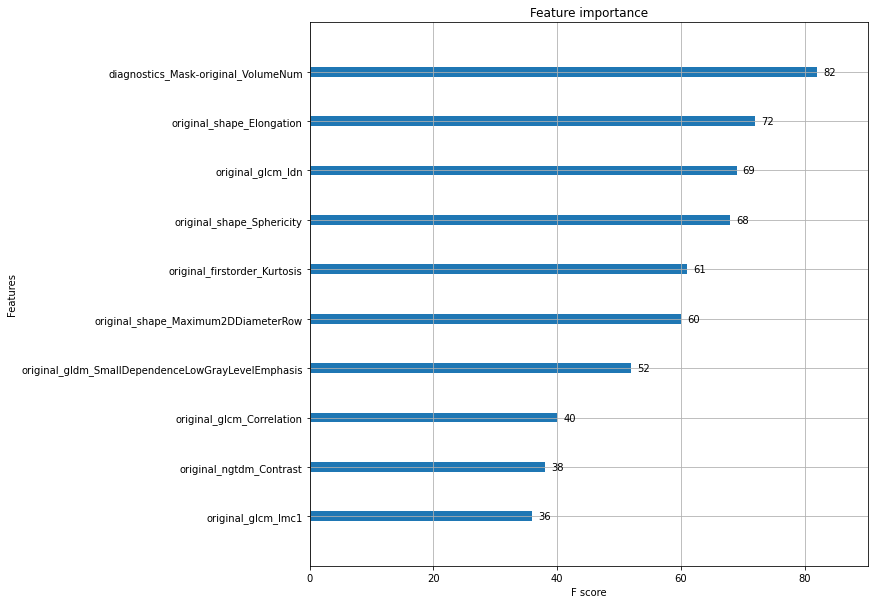

In [ ]:
# Feature importance based on XGB model:

# Will use popular xgboost model:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# Fit model on training data:
modelXGB = XGBClassifier(random_state=42)
modelXGB.fit(X_TCGA_train, y_TCGA_train)

# Plot feature importance:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(modelXGB, max_num_features=10, ax=ax)
plt.show()


In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Feature Selection 

GridSearch MultiClass Classification with top 50 features

In [ ]:
# Feature importance based on Random Forest model:

# Feature importance ranking:
feature_rank_df = pd.DataFrame(
    {"feature": X_train.columns.tolist(), "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

mylist50 = feature_rank_df.head(50)

mylist20 = feature_rank_df.head(20)

In [ ]:
# Limit features to top 50 important features:

feature_selection_list_50 = mylist50['feature']

feature_selection_list_20 = mylist20['feature']

X_train_top50 = X_train[X_train.columns.intersection(feature_selection_list_50)]

X_train_top20 = X_train[X_train.columns.intersection(feature_selection_list_20)]

X_test_top50 = X_test[X_test.columns.intersection(feature_selection_list_50)]

X_test_top20 = X_test[X_test.columns.intersection(feature_selection_list_20)]

## Task 3 : Apply model on Rembrandt data (test set) after training on TCGA (train set)

In [ ]:
len(X_train.columns), len(X_train), len(y_train)

(111, 203, 203)

In [ ]:
len(X_test.columns), len(X_test), len(y_test)

(111, 58, 58)

GridSearch on Multiclass classification

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
#chose six models to train the data with to see which performs the best : Logistic Regression, Decision Tree Classifier, Random Forest, KNeighbors,Support Vector Machine, and XGBoost
pipe_lr = Pipeline([('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('XGB', XGBClassifier(random_state=42))])

#create GridSearch parameters

#creates lists to pass into the grid below
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
#these will be passed to the GridSearchCV function below -> which will take a pipeline model and test out each paramter value passed through in the following parameter list
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

##use the GridSearchCV function and pass in both the pipeline created above and the frid parameters 

#pass in cv=3 for the fridsearch to perform cross-validation on our training set
#pass score = accuracy for get the accrucay score when the test is performed 
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=3)

grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]

for pipe in grids:
    pipe.fit(X_train,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
#then create a for loop to run them all 
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.27586206896551724
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.1724137931034483
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 1, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.3103448275862069
Random Forest Best Params: {'RF__max_depth': 1, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.3103448275862069
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
Support Vector Machines Test Accuracy: 0.3103448275862069
Support Vector Machines Best Params: {'SVM__C': 1, 'SVM__kernel': 'rbf'}
XGBoost Test Accuracy: 0.20689655172413793
XGBoost Best Params: {'XGB__learning_rate': 0.2, 'XGB__max_depth': 1, 'XGB__min_child_weight': 2, 'XGB__n_estimators': 50, 'XGB__subsample': 0.1}


In [ ]:
from sklearn.metrics import plot_confusion_matrix

## Task 4 : Create confusion matrix for top three model performers

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


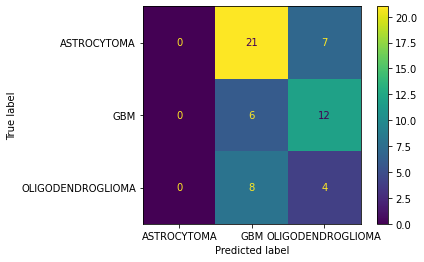

In [ ]:
plot_confusion_matrix(dt_grid_search, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


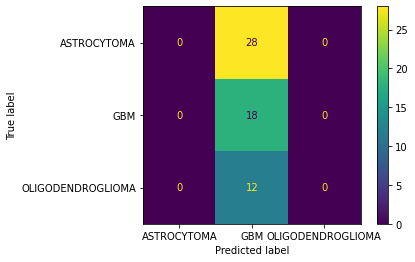

In [ ]:
plot_confusion_matrix(rf_grid_search, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


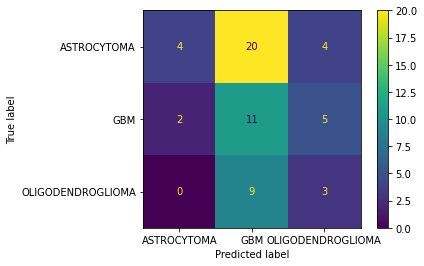

In [ ]:
plot_confusion_matrix(knn_grid_search, X_test, y_test)

## Run models with Top 50 and Top 20 Feautres 

In [ ]:
for pipe in grids:
    pipe.fit(X_train_top50,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
#then create a for loop to run them all 
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test_top50,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.27586206896551724
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.2413793103448276
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 4, 'DT__min_samples_leaf': 2, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.3448275862068966
Random Forest Best Params: {'RF__max_depth': 2, 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.25862068965517243
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
Support Vector Machines Test Accuracy: 0.3275862068965517
Support Vector Machines Best Params: {'SVM__C': 1, 'SVM__kernel': 'rbf'}
XGBoost Test Accuracy: 0.2413793103448276
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 1, 'XGB__min_child_weight': 2, 'XGB__n_estimators': 50, 'XGB__subsample': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


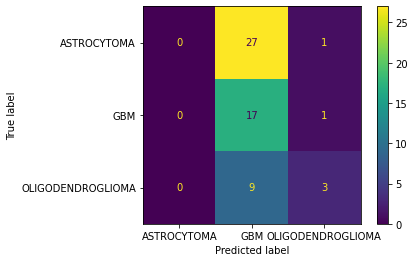

In [ ]:
plot_confusion_matrix(rf_grid_search, X_test_top50, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


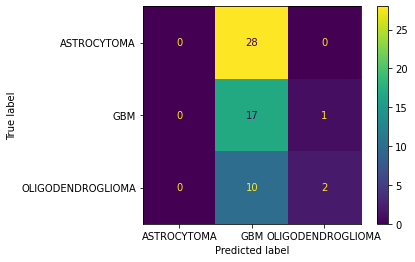

In [ ]:
plot_confusion_matrix(svm_grid_search, X_test_top50, y_test)

GridSearch MultiClass Classification with top 20 features

In [ ]:
for pipe in grids:
    pipe.fit(X_train_top20,y_train)

In [ ]:
#first create a dictionary that contains the classifier types to used int eh for loop. 
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
#then create a for loop to run them all 
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test_top20,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.25862068965517243
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.22413793103448276
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 4, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.3448275862068966
Random Forest Best Params: {'RF__max_depth': 5, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.3620689655172414
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
Support Vector Machines Test Accuracy: 0.2413793103448276
Support Vector Machines Best Params: {'SVM__C': 4, 'SVM__kernel': 'rbf'}
XGBoost Test Accuracy: 0.3103448275862069
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 2, 'XGB__min_child_weight': 2, 'XGB__n_estimators': 50, 'XGB__subsample': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


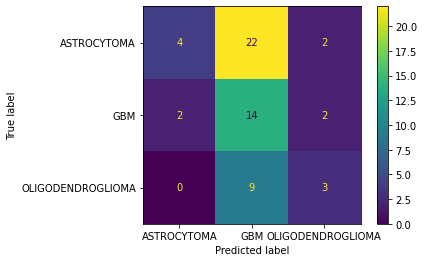

In [ ]:
plot_confusion_matrix(knn_grid_search, X_test_top20, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


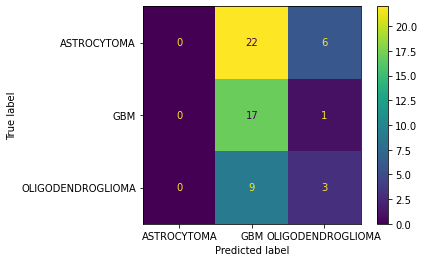

In [ ]:
plot_confusion_matrix(rf_grid_search, X_test_top20, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


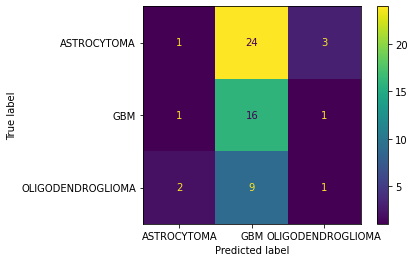

In [ ]:
plot_confusion_matrix(xgb_grid_search, X_test_top20, y_test)